In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf #텐서플로우 2.x 실행

# AUTO ENCODER

### 1. AUTO ENCODER 간단한 실습

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

오토인코더는 비지도학습이므로 y의 값을 받지않고 진행합니다.

In [47]:
(x_train,_),(x_test,_) = datasets.mnist.load_data() # 비지도학습

데이터를 정규화 하여 학습에 알맞은 형태로 바꿉니다.

In [48]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [49]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [50]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Hidden_input은 아래 그림에서 중간 노란색 노드의 개수를 의미합니다.   
즉, Encoding 단계에서 이미지를 얼마만큼 압축할 것인지를 의미합니다.  

In [51]:
Hidden_input = 100 #압축 크기

오토인코더의 구조는 간단합니다.  
입력층 --> 히든층 --> 출력층 으로 이루어져 있습니다.  

선언하는 Model은 원래는 한개지만 압축 후에는 어떤 형태를 이루는지 보기위해서 인코더 모델을 하나 더 만들어보겠습니다.

In [52]:
#오토인코더 모델 구성
input_layer = layers.Input(shape=(784,))  #입력층
Encoding = layers.Dense(Hidden_input)(input_layer) #히든층(이미지를 압축)
Decoding = layers.Dense(784, activation='sigmoid')(Encoding) #출력층(이미지를 원래크기로 복원)

autoencoder = models.Model(input_layer,Decoding) #오토인코더 모델 선언

#인코더 모델선언
encoder = models.Model(input_layer,Encoding) 

모델을 Compile 시킵니다.  
sigmoid를 사용했으니 Binary_crossentropy를 사용합니다.

In [53]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])

해당 코드가 이미지를 압축했다가 재구성을 하므로 입력과 출력은 x_train을 넣고 진행합니다.  

In [54]:
autoencoder.fit(x_train, x_train, epochs=5, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1229 - mse: 0.0190 - val_loss: 0.0788 - val_mse: 0.0054
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - mse: 0.0041 - val_loss: 0.0708 - val_mse: 0.0032
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - mse: 0.0029 - val_loss: 0.0686 - val_mse: 0.0025
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - mse: 0.0025 - val_loss: 0.0679 - val_mse: 0.0023
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0681 - mse: 0.0023 - val_loss: 0.0676 - val_mse: 0.0022


이번에는 학습이 잘 되었는지를 확인하기 위해 Predict를 하겠습니다.  
encoder에 x_test를 넣어 압축된 이미지를 생성합니다.  

In [55]:
predict_encoded_img = encoder.predict(x_test)

원래 이미지를 50개 정도 출력을 해보겠습니다.

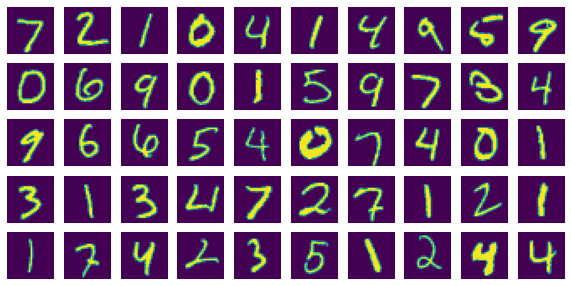

In [56]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.axis('off')
plt.show()

이번에는 압축 후 원복 시킨 이미지를 출력시켜보겠습니다.  

In [57]:
predict_encoded_img[0].shape

(100,)

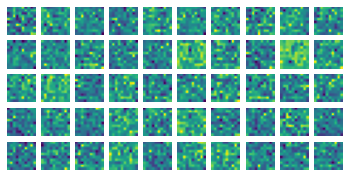

In [58]:
plt.figure(figsize=(6,3))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_encoded_img[i].reshape(10,10))
  plt.axis('off')
plt.show()

이번에는 autoencoder 모델로 예측을 해보겠습니다.

In [59]:
predict_autoencoded_img = autoencoder.predict(x_test)

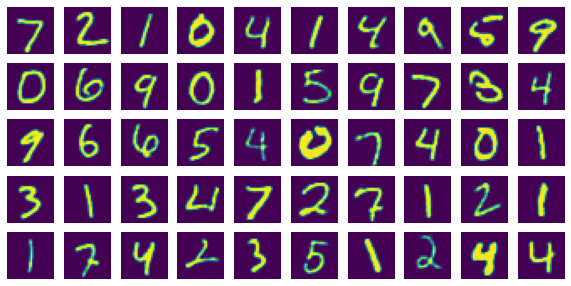

In [60]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

원래 데이터와 압축후에 나온 데이터를 비교했을 때 흐릿한 것을 알 수가 있습니다.  

### 2. Deep AUTO ENCODER 실습

이번에는 싱글로 구성된 오토인코더 아닌 여러층으로 깊이 쌓은 오토인코더를 만들어보겠습니다.   
(x_train, x_test 부분까지는 위에 코드를 그대로 사용하므로, 생략하겠습니다.)

이번에는 여러층을 쌓기 위해서 hidden_input을 다양하게 설정하겠습니다. 

In [67]:
Hidden_input1 = 400
Hidden_input2 = 225
Hidden_input3 = 100

In [74]:
#오토인코더 모델 구성
input_layer = layers.Input(shape=(784,))  #입력층
Encoding1 = layers.Dense(Hidden_input1)(input_layer) #히든층(이미지를 압축)
Encoding2 = layers.Dense(Hidden_input2)(Encoding1)
Encoding3 = layers.Dense(Hidden_input3)(Encoding2)
Decoding1 = layers.Dense(Hidden_input2)(Encoding3)
Decoding2 = layers.Dense(Hidden_input1)(Decoding1)
Decoding3 = layers.Dense(784, activation='sigmoid')(Decoding2) #출력층(이미지를 원래크기로 원복)

autoencoder = models.Model(input_layer,Decoding3) #오토인코더 모델 선언

encoder_1 = models.Model(input_layer, Encoding1)
encoder_2 = models.Model(input_layer, Encoding2)
encoder_3 = models.Model(input_layer, Encoding3)
decoder_1 = models.Model(input_layer, Decoding1)
decoder_2 = models.Model(input_layer, Decoding2)

In [75]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])

In [76]:
autoencoder.fit(x_train, x_train, epochs=5, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0953 - mse: 0.0106 - val_loss: 0.0755 - val_mse: 0.0045
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - mse: 0.0042 - val_loss: 0.0727 - val_mse: 0.0037
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - mse: 0.0035 - val_loss: 0.0716 - val_mse: 0.0033
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0717 - mse: 0.0033 - val_loss: 0.0707 - val_mse: 0.0030
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712 - mse: 0.0031 - val_loss: 0.0703 - val_mse: 0.0029


In [79]:
predict_encoded_1_img = encoder_1.predict(x_test)
predict_encoded_2_img = encoder_2.predict(x_test)
predict_encoded_3_img = encoder_3.predict(x_test)
predict_decoded_1_img = decoder_1.predict(x_test)
predict_decoded_2_img = decoder_2.predict(x_test)

predict_autoencoded_img = autoencoder.predict(x_test)


In [93]:
def print_img(x):
    plt.figure(figsize=(20,2))
    for i in range(20) : 
        plt.subplot(1,20,i+1)
        plt.imshow(x[i])
        plt.axis('off')  
    plt.show()   

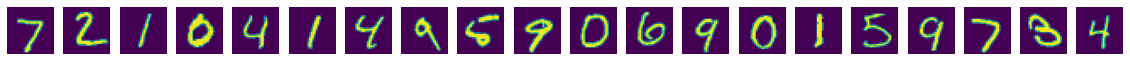

In [94]:
print_img(x_test.reshape(-1, 28, 28))

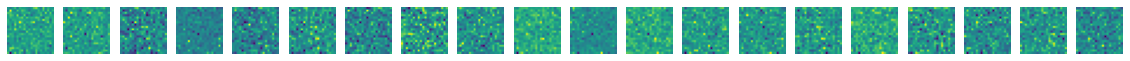

In [95]:
print_img(predict_encoded_1_img.reshape(-1, 20, 20))

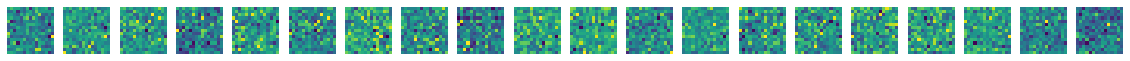

In [96]:
print_img(predict_encoded_2_img.reshape(-1, 15, 15))

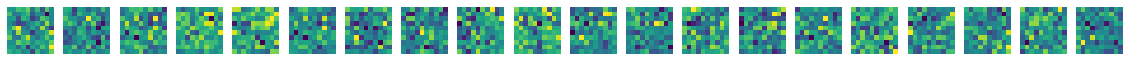

In [98]:
print_img(predict_encoded_3_img.reshape(-1, 10, 10))

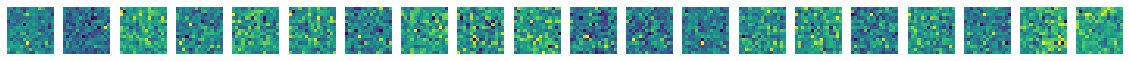

In [99]:
print_img(predict_decoded_1_img.reshape(-1, 15, 15))

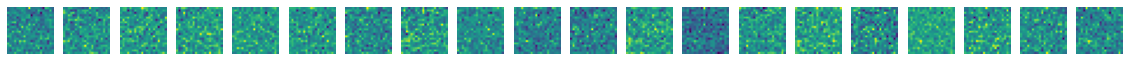

In [100]:
print_img(predict_decoded_2_img.reshape(-1, 20, 20))

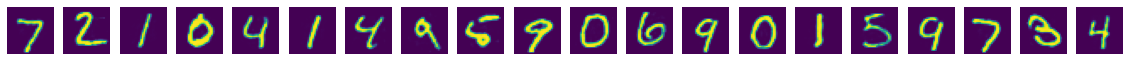

In [101]:
print_img(predict_autoencoded_img.reshape(-1, 28, 28))